### Last week

- Essentials for machine learning
- Project - Predict Taxi Trip Duration
- Introduction to Logistic Regression
- Logistic regression from Scratch

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('bmh')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### About dataset
- The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [3]:
df.shape

(768, 9)

In [4]:
# features and targets
x = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [5]:
# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4, random_state=42, stratify=y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(307, 8) (307,) (461, 8) (461,)


In [6]:
neighbors = range(1,10)
train_accu = np.empty(len(neighbors))
test_accu = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accu[i] = knn.score(x_train,y_train)
    test_accu[i] = knn.score(x_test,y_test)

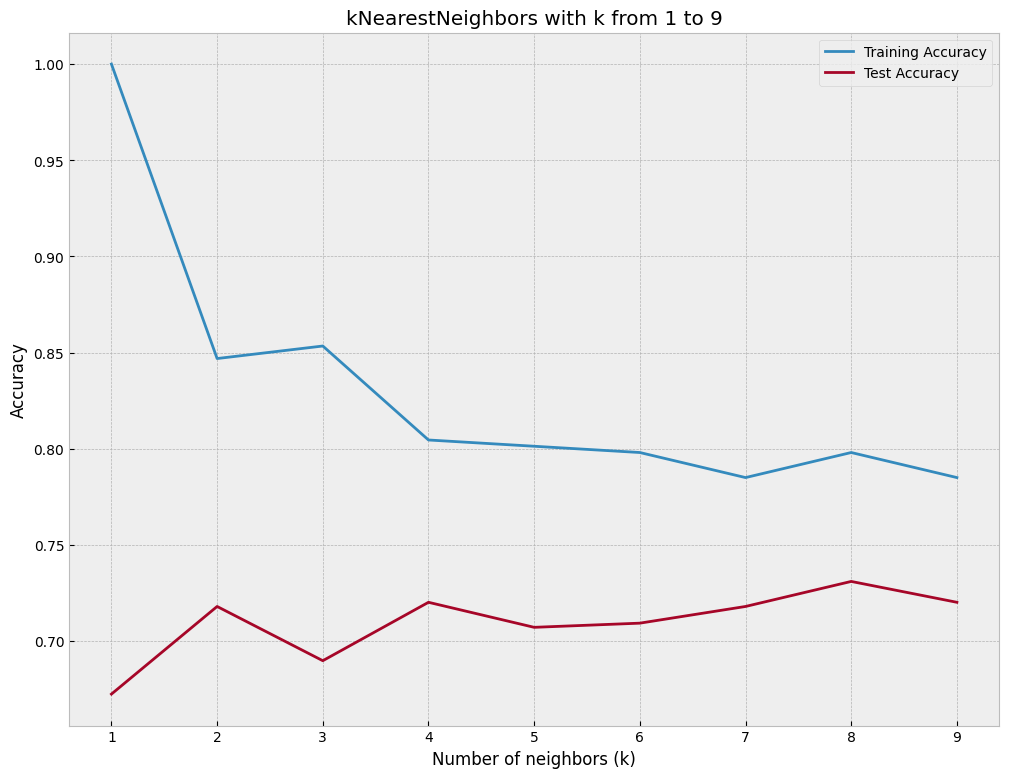

In [7]:
# plotting the above train and test accuracy
plt.figure(figsize =(12,9))
plt.title('kNearestNeighbors with k from 1 to 9')
plt.plot(neighbors, train_accu, label='Training Accuracy')
plt.plot(neighbors, test_accu, label='Test Accuracy')
plt.legend()
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

- We can see testing accuracy at *<ins>k=8</ins>* is highest, hence lets create KNearestNeighborClassifier with k=8

In [8]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [9]:
knn.score(x_test,y_test)

0.7310195227765727

In [10]:
# creating confusion matrix
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[260,  40],
       [ 84,  77]])

In [11]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       344
           1       0.48      0.66      0.55       117

    accuracy                           0.73       461
   macro avg       0.67      0.71      0.68       461
weighted avg       0.77      0.73      0.74       461



In [12]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

### Hyperparameter tuning of knn

In [13]:
# parameters
param_grid = {
    'n_neighbors': np.arange(1,50)
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [14]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 12}
0.7654680063458488


### Next week
- Introduction to SVM
- Hyperparameter Tuning
- Code walkthrough - SVM